### K-NN (K-nearest neighborhood)

Accuracy: 0.80
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.64      0.78      0.70         9
           2       0.78      0.64      0.70        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30



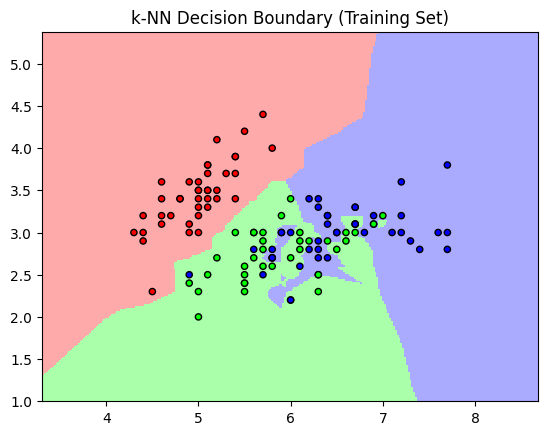

In [11]:
# 필요한 라이브러리 임포트
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 붓꽃 데이터셋 로드
iris = datasets.load_iris()
X = iris.data[:, :2]  # 처음 두 개의 특성만 사용
y = iris.target

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-NN 모델 생성
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # k=3으로 설정
knn_classifier.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = knn_classifier.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 분류 보고서 출력
print(classification_report(y_test, y_pred))

# 결정 경계 시각화를 위한 함수 정의
def plot_decision_boundary(X, y, model, title):
    h = .02  # 메쉬의 스텝 크기
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # 훈련 데이터 포인트 그리기
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

# 결정 경계 시각화
plot_decision_boundary(X_train, y_train, knn_classifier, 'k-NN Decision Boundary (Training Set)')
plt.show()


### SVM(Support Vector Machine)

#### SVM(Support Vector Classification)

Accuracy: 0.90


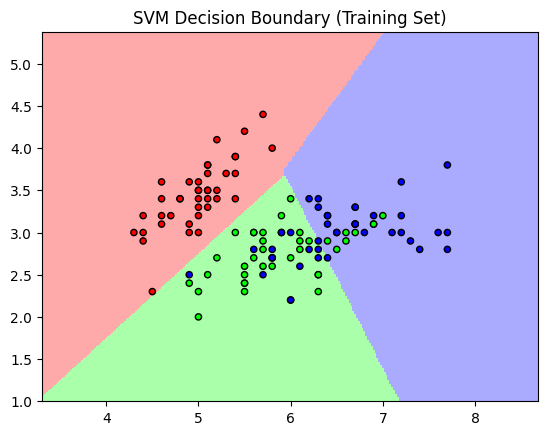

In [12]:
# 필요한 라이브러리 임포트
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 붓꽃 데이터셋 로드
iris = datasets.load_iris()
X = iris.data[:, :2]  # 처음 두 개의 특성만 사용
y = iris.target

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM 모델 생성
svm_classifier = SVC(kernel='linear')  # 선형 커널 사용
svm_classifier.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = svm_classifier.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 결정 경계 시각화를 위한 함수 정의
def plot_decision_boundary(X, y, model, title):
    h = .02  # 메쉬의 스텝 크기
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # 훈련 데이터 포인트 그리기
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

# 결정 경계 시각화
plot_decision_boundary(X_train, y_train, svm_classifier, 'SVM Decision Boundary (Training Set)')
plt.show()




#### SVR(Support Vector Regression)

Mean Squared Error: 173.53


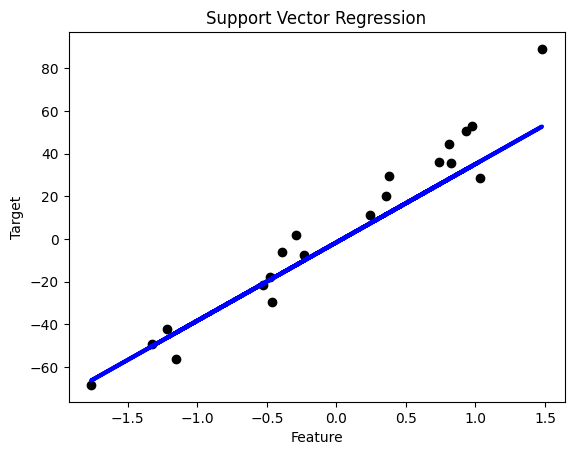

In [13]:
# 필요한 라이브러리 임포트
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 SVM 모델 생성
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = svr.predict(X_test)

# 평균 제곱 오차(MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# 테스트 데이터와 예측 결과 시각화
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Support Vector Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()


### Decision Trees

Accuracy: 1.00


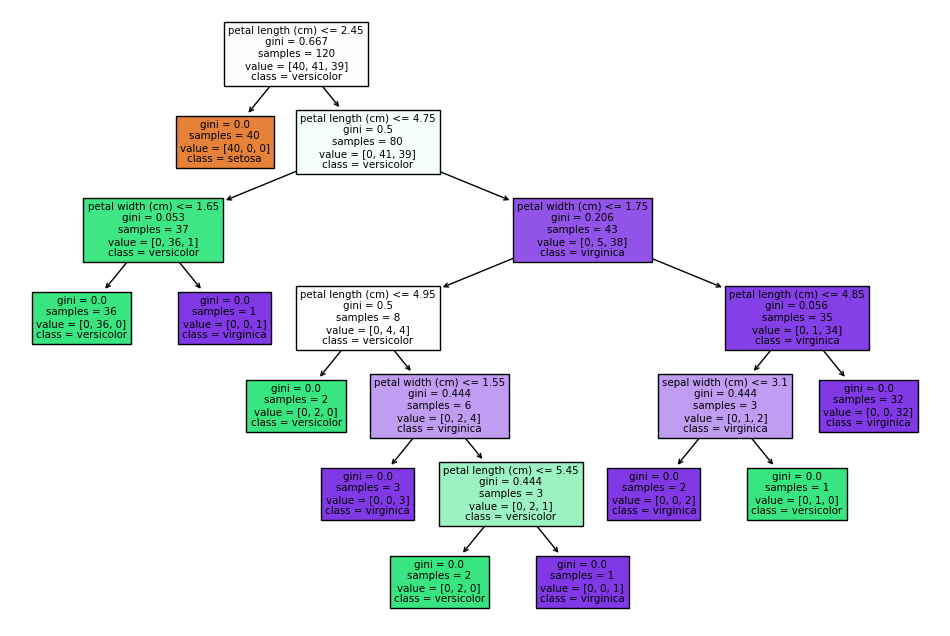

In [6]:
# 필요한 라이브러리 임포트
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 붓꽃 데이터셋 로드
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 의사결정 트리 모델 생성
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = decision_tree.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 트리 시각화
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()
